In this notebook i'll use Boston house pricing dataset to do Simple Linear Regression.
First i'll use sklearn's inbuilt Linear Regresion Algorithm and then make my own Linear Regression from scratch Using Ordinal least Square and comapre the results 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = fetch_openml(name='boston')
values = data.data
columns = data.feature_names
target = data.target
df = pd.concat([pd.DataFrame(values, columns=columns), pd.Series(target, name="target")], axis=1)

C:\Users\shrey\AppData\Local\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:303: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\shrey\AppData\Local\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<Axes: >

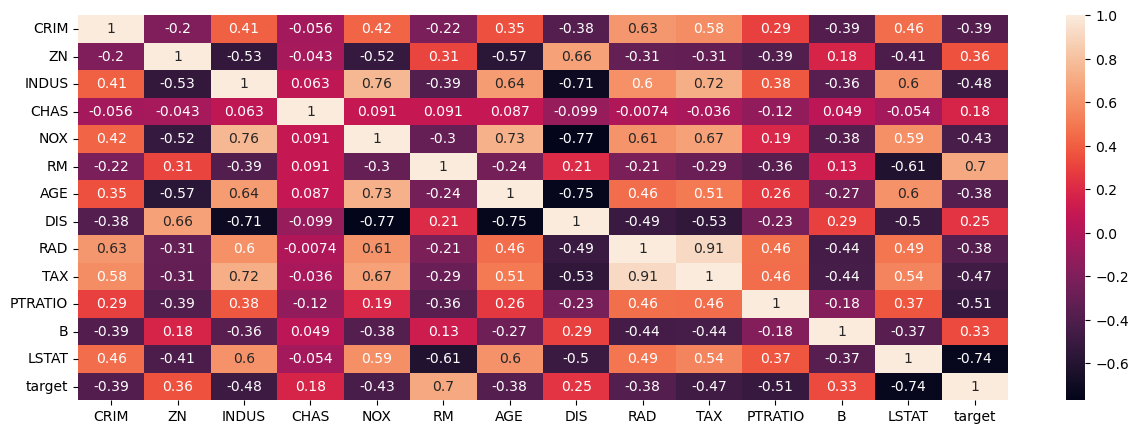

In [8]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)

Since this is a Simple Linear regression Problem that im trying to solve so i'll use only column  that is highly Correlated with the target column
- LSTAT is negatively correlated to the target column which means when the LSTAT value Increases the value of target Column decreases

<Axes: xlabel='LSTAT', ylabel='target'>

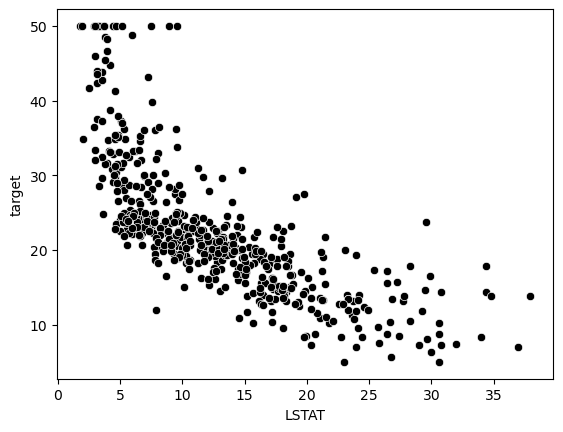

In [9]:
sns.scatterplot(x = df["LSTAT"], y = df["target"], color="black")

<Axes: xlabel='LSTAT', ylabel='Count'>

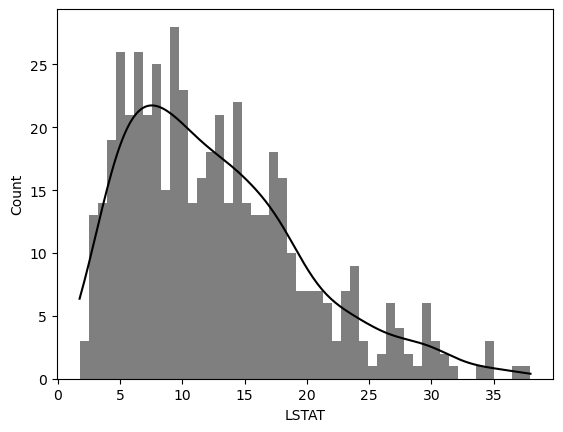

In [10]:
sns.histplot(df["LSTAT"], bins =50, edgecolor=None, kde=True, color="black")

In this notebook, we observe that the LSTAT column exhibits positive skewness. As part of the assumptions for Linear Regression, it is preferable for the data columns to follow a normal distribution to achieve optimal results. However, it's important to note that in this notebook, the primary focus is on developing a custom regression algorithm, and addressing normality is beyond the scope of this particular endeavor.

# Using Sklearn's Implementation

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df["LSTAT"] , target, test_size=0.2, random_state=0)

In [12]:
linear_regression = LinearRegression()
linear_regression.fit(X_train.values.reshape(-1,1), y_train)
pred = linear_regression.predict(X_test.values.reshape(-1,1))
print(f"Coefficient of given model is: {linear_regression.coef_}")
print(f"Inpercept of given model is: {linear_regression.intercept_}")
print(f"Mean Square Error: {mean_squared_error(y_test, pred)} ")

Coefficient of given model is: [-0.95648761]
Inpercept of given model is: 34.76519272372788
Mean Square Error: 46.33630536002592 


Here Coefficient means the slope of the Regression Line and the intercept means the point at which the line intersects with y axis

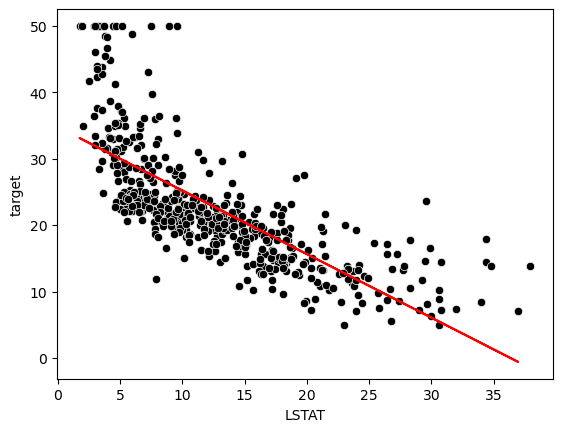

In [14]:
sns.scatterplot(x = df["LSTAT"], y = df["target"], color="black")
plt.plot(X_train , linear_regression.predict(X_train.values.reshape(-1,1)), color="red")

# Using Self made code

Before moving on with making the my own class there are some formulas that are derived using OLS for the intercelp and coefficeient thoose are:
 - $\ y = mX + b$
 - $\ b = \bar{y} - \ m \bar{X} $
 - $ \ m = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(y_i - \bar{y})}{\sum_{i=1}^{n} (X_i - \bar{X})^2} $
 
 here: 
 - $b$ = intercept
 - $m$ = slope or coefficient
 - $X$ = input value
 - $\bar{X}$ = mean of input values 
 - $y$ = target value
 - $\bar{y}$ = mean of Target values





In [15]:
class SelfMadeSimpleLinearRegression:
    
    def __init__(self):
        self.intercept_ = None
        self.coef_ = None
        
    def fit(self, x_train, y_train):
        numerator = 0
        denominator = 0
        
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        
        for x, y in zip(x_train, y_train):
            numerator += (x - x_mean) * (y - y_mean)
            denominator += (x - x_mean) ** 2
        
        self.coef_ = numerator / denominator   
        self.intercept_ = y_mean - (self.coef_ * x_mean)
        
    def predict(self, x_test):
        pred_value = []
        for x in x_test:
            pred = (self.coef_ * x) + self.intercept_
            pred_value.append(pred)
            
        return np.array(pred_value)

In [16]:
linear_regression_ = SelfMadeSimpleLinearRegression()
linear_regression_.fit(X_train.values.reshape(-1,1), y_train)
pred_ = linear_regression_.predict(X_test.values.reshape(-1,1))
print(f"Coefficient of given model is: {linear_regression_.coef_}")
print(f"Inpercept of given model is: {linear_regression_.intercept_}")
print(f"Mean Square Error: {mean_squared_error(y_test, pred_)} ")

Coefficient of given model is: [-0.95648761]
Inpercept of given model is: [34.76519272]
Mean Square Error: 46.336305360025925 


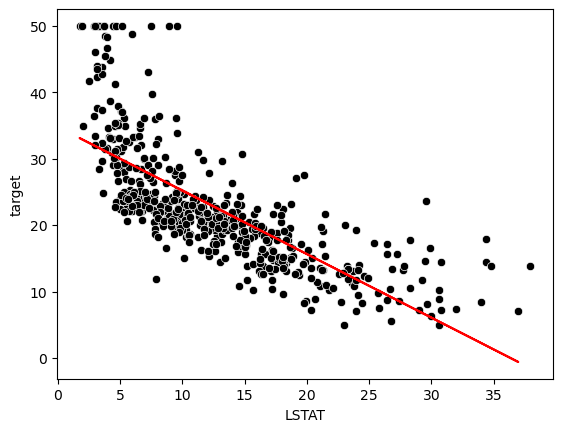

In [17]:
sns.scatterplot(x = df["LSTAT"], y = df["target"], color="black")
plt.plot(X_train , linear_regression_.predict(X_train.values.reshape(-1,1)), color="red")

This Regression class is only capable to handle only one input Variable.

For Multiple Linear Regression you can refer to 